Plan is to isloate the most likely variables to predict a swing and a miss

In [1]:
from pybaseball import statcast
import pandas as pd
import numpy as np

In [2]:
statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns

This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:04<00:04,  4.35s/it]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description',
       ...
       'batter_days_until_next_game', 'api_break_z_with_gravity',
       'api_break_x_arm', 'api_break_x_batter_in', 'arm_angle', 'attack_angle',
       'attack_direction', 'swing_path_tilt',
       'intercept_ball_minus_batter_pos_x_inches',
       'intercept_ball_minus_batter_pos_y_inches'],
      dtype='object', length=118)

In [3]:
statcast(start_dt="2019-06-24", end_dt="2019-06-25").head()

This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  1.98it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
3016,FF,2019-06-25,93.1,-2.33,5.21,"Festa, Matt",460075,670036,field_out,hit_into_play,...,1,1.41,0.69,0.69,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3044,SL,2019-06-25,87.0,-2.27,5.16,"Festa, Matt",592885,670036,strikeout,swinging_strike_blocked,...,1,2.39,-0.36,0.36,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3174,FF,2019-06-25,93.3,-2.59,4.93,"Festa, Matt",592885,670036,NaN,ball,...,1,1.44,0.5,-0.5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3293,FF,2019-06-25,93.3,-2.4,5.07,"Festa, Matt",592885,670036,NaN,foul,...,1,1.4,0.32,-0.32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3411,FF,2019-06-25,92.8,-2.62,5.05,"Festa, Matt",592885,670036,NaN,called_strike,...,1,1.48,0.38,-0.38,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## EDA

In [4]:
statcast_df = statcast(start_dt="2019-06-24", end_dt="2019-07-25")
distinct_descriptions = statcast_df["description"].unique()
print(distinct_descriptions)
description_counts = statcast_df["description"].value_counts()
print(description_counts)


This is a large query, it may take a moment to complete


  0%|          | 0/32 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  3%|▎         | 1/32 [00:00<00:29,  1.05it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  6%|▋         | 2/32 [00:01<00:14,  2.05it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: 

['swinging_strike' 'ball' 'foul' 'called_strike' 'hit_into_play'
 'foul_tip' 'blocked_ball' 'swinging_strike_blocked' 'hit_by_pitch'
 'foul_bunt' 'automatic_ball' 'pitchout' 'missed_bunt' 'bunt_foul_tip']
description
ball                       37808
foul                       20751
hit_into_play              19729
called_strike              18323
swinging_strike            12033
blocked_ball                2641
foul_tip                    1049
swinging_strike_blocked      927
automatic_ball               399
hit_by_pitch                 299
foul_bunt                    251
missed_bunt                   46
pitchout                      13
bunt_foul_tip                  7
Name: count, dtype: int64


In [5]:
print(statcast_df.shape)


(114276, 118)


In [ ]:
## Drop unhelpful columns

In [25]:
coverage = (1 - statcast_df.isna().mean()).sort_values(ascending=False)
low_coverage = coverage[coverage < 0.70]
low_coverage.head(42)
low_coverage_cols = low_coverage.index.tolist()
low_coverage_cols

['on_1b',
 'hyper_speed',
 'launch_angle',
 'launch_speed',
 'hit_distance_sc',
 'iso_value',
 'babip_value',
 'woba_value',
 'events',
 'woba_denom',
 'estimated_woba_using_speedangle',
 'hit_location',
 'on_2b',
 'bb_type',
 'hc_x',
 'hc_y',
 'launch_speed_angle',
 'estimated_ba_using_speedangle',
 'estimated_slg_using_speedangle',
 'on_3b',
 'umpire',
 'tfs_zulu_deprecated',
 'tfs_deprecated',
 'sv_id',
 'break_length_deprecated',
 'break_angle_deprecated',
 'spin_rate_deprecated',
 'spin_dir',
 'swing_length',
 'bat_speed',
 'arm_angle',
 'attack_angle',
 'attack_direction',
 'swing_path_tilt',
 'intercept_ball_minus_batter_pos_x_inches',
 'intercept_ball_minus_batter_pos_y_inches']

In [ ]:
# Add useful columns to prevent removal
useful_cols = ['on_2b', 'on_3b', 'on_1b']

drop_cols = sorted(set(low_coverage_cols) - set(useful_cols))
(drop_cols)


['arm_angle',
 'attack_angle',
 'attack_direction',
 'babip_value',
 'bat_speed',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'estimated_ba_using_speedangle',
 'estimated_slg_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'hyper_speed',
 'intercept_ball_minus_batter_pos_x_inches',
 'intercept_ball_minus_batter_pos_y_inches',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'spin_dir',
 'spin_rate_deprecated',
 'sv_id',
 'swing_length',
 'swing_path_tilt',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'umpire',
 'woba_denom',
 'woba_value']

In [30]:
sc_df_reduced = statcast_df.drop(columns=drop_cols)
sc_df_reduced.shape


(114276, 85)

In [38]:
sc_df_reduced.dtypes.value_counts()

Int64             44
Float64           26
object            14
datetime64[ns]     1
Name: count, dtype: int64

In [35]:
int_cols = sc_df_reduced.select_dtypes(include=['int64', 'float64']).columns
int_cols

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher',
       'zone', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2',
       'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7',
       'fielder_8', 'fielder_9', 'release_pos_y', 'at_bat_number',
       'pitch_number', 'home_score', 'away_score', 'bat_score', 'fld_score',
       'post_away_score', 'post_home_score', 'post_bat_score',
       'post_fld_score', 'spin_axis', 'delta_home_win_exp', 'delta_run_exp',
       'delta_pitcher_run_exp', 'home_score_diff', 'bat_score_diff',
       'home_win_exp', 'bat_win_exp', 'age_pit_legacy', 'age_bat_legacy',
       'age_pit', 'age_bat', 'n_thruorder_pitcher',
       'n_priorpa_thisgame_player_at_bat', 'pitcher_days_since_p

In [ ]:
cat_cols = sc_df_reduced.select_dtypes(include=['object', 'category', 'bool']).columns
cat_cols

Index(['pitch_type', 'player_name', 'description', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'inning_topbot',
       'pitch_name', 'if_fielding_alignment', 'of_fielding_alignment'],
      dtype='object')

In [46]:
# dropping columns that are either unhelpful or will give away result
drop_cols_2 = ['player_name', 'des', 'type', 'delta_run_exp', 'delta_pitcher_run_exp', 'post_home_score', 'post_away_score', 'post_bat_score',
               'post_fld_score', 'home_team', 'away_team']
sc_df_reduced = sc_df_reduced.drop(columns=drop_cols_2)
sc_df_reduced.shape


(114276, 74)

In [8]:
statcast_df.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
pitch_type,113816,16,FF,41634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_date,114276,NaN,NaN,NaN,2019-07-09 22:20:17.263467264,2019-06-24 00:00:00,2019-07-01 00:00:00,2019-07-12 00:00:00,2019-07-19 00:00:00,2019-07-25 00:00:00,NaN
release_speed,113833.0,<NA>,<NA>,<NA>,88.80022,50.8,84.6,90.1,93.5,102.4,5.969481
release_pos_x,113828.0,<NA>,<NA>,<NA>,-0.724525,-5.38,-2.14,-1.5,1.31,4.73,1.967548
release_pos_z,113828.0,<NA>,<NA>,<NA>,5.893724,0.59,5.62,5.92,6.22,7.35,0.495926
...,...,...,...,...,...,...,...,...,...,...,...
attack_angle,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
attack_direction,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
swing_path_tilt,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
intercept_ball_minus_batter_pos_x_inches,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  1.75it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:01<00:00,  1.79it/s]


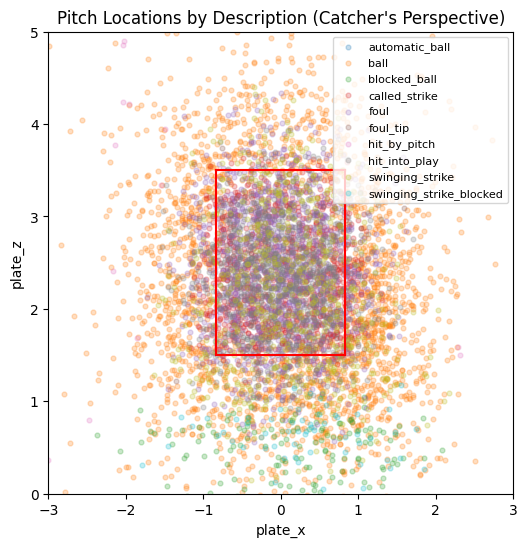

In [50]:
import matplotlib.pyplot as plt

sc_df_reduced = statcast(start_dt="2019-06-24", end_dt="2019-06-25")

# Top 10 descriptions for readable legend
top_desc = sc_df_reduced["description"].value_counts().head(10).index
plot_df = sc_df_reduced[sc_df_reduced["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone overlay
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Pitch Locations by Description (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


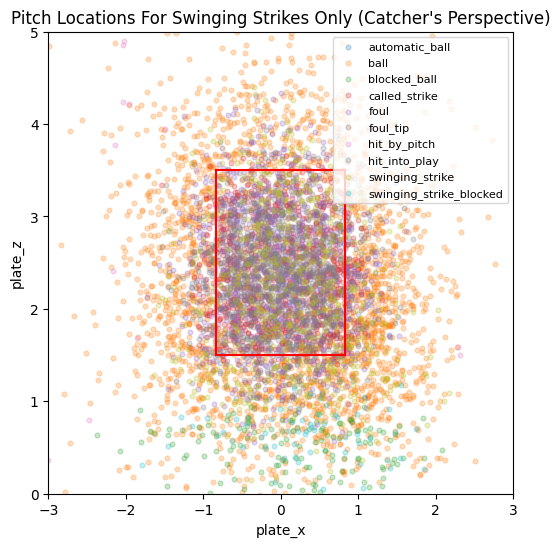

In [ ]:
import matplotlib.pyplot as plt

# Top 10 descriptions for readable legend
top_desc = sc_df_reduced["description"].value_counts().head(10).index
plot_df = sc_df_reduced[sc_df_reduced["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone overlay
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Pitch Locations For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


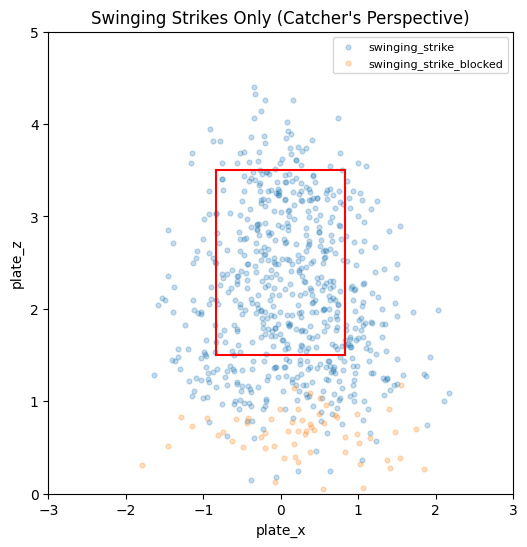

In [52]:
import matplotlib.pyplot as plt

mask = sc_df_reduced["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_reduced[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


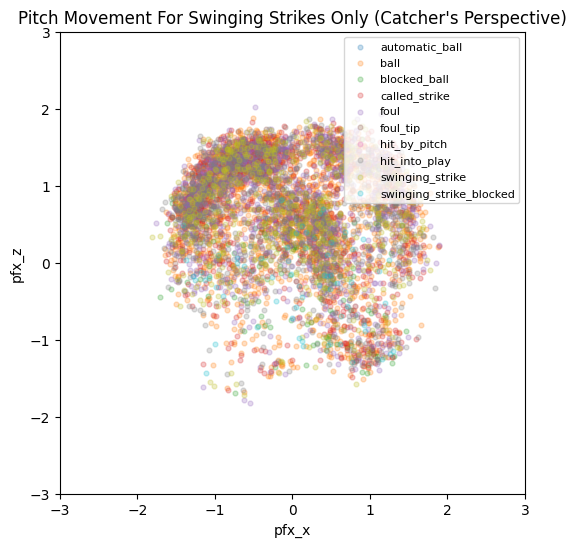

In [55]:
import matplotlib.pyplot as plt

# Top 10 descriptions for readable legend
top_desc = sc_df_reduced["description"].value_counts().head(10).index
plot_df = sc_df_reduced[sc_df_reduced["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


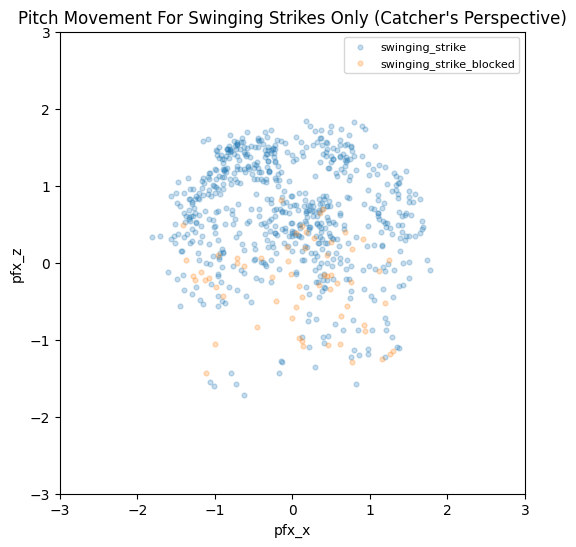

In [56]:
import matplotlib.pyplot as plt

mask = sc_df_reduced["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_reduced[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  1.30it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


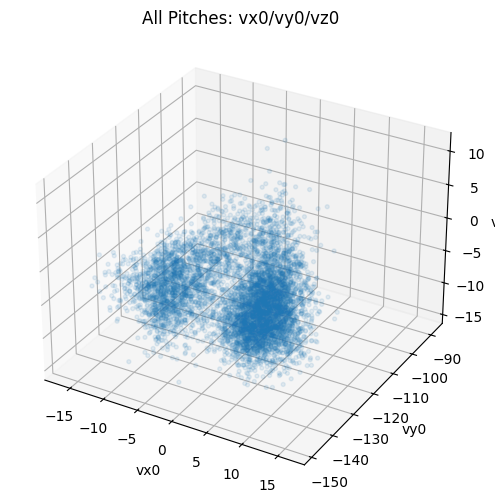

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3d)

statcast_df = statcast(start_dt="2019-06-24", end_dt="2019-06-25")

# --- No mask ---
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(statcast_df["vx0"], statcast_df["vy0"], statcast_df["vz0"], alpha=0.1, s=8)
ax.set_xlabel("vx0")
ax.set_ylabel("vy0")
ax.set_zlabel("vz0")
ax.set_title("All Pitches: vx0/vy0/vz0")
plt.show()



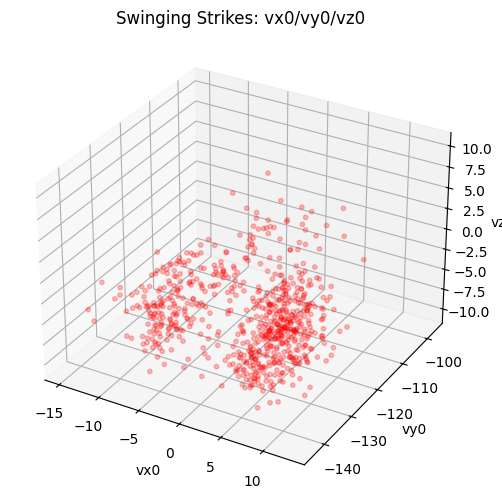

In [58]:

# --- With mask (swinging strikes only) ---
mask = statcast_df["description"].isin(["swinging_strike", "swinging_strike_blocked"])
masked_df = statcast_df[mask]

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(masked_df["vx0"], masked_df["vy0"], masked_df["vz0"], alpha=0.25, s=10, c="red")
ax.set_xlabel("vx0")
ax.set_ylabel("vy0")
ax.set_zlabel("vz0")
ax.set_title("Swinging Strikes: vx0/vy0/vz0")
plt.show()

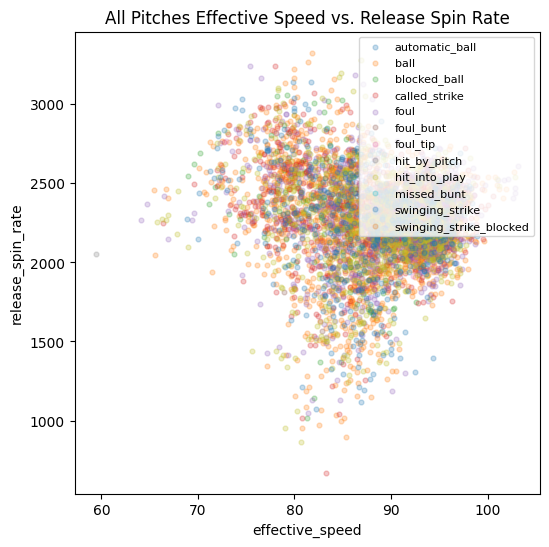

In [66]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
for desc, group in sc_df_reduced.groupby("description"):
    plt.scatter(group["effective_speed"], group["release_spin_rate"], alpha=0.25, s=12, label=desc)

plt.xlabel("effective_speed")
plt.ylabel("release_spin_rate")
plt.title("All Pitches Effective Speed vs. Release Spin Rate")
plt.legend(loc="upper right", fontsize=8)
plt.show()


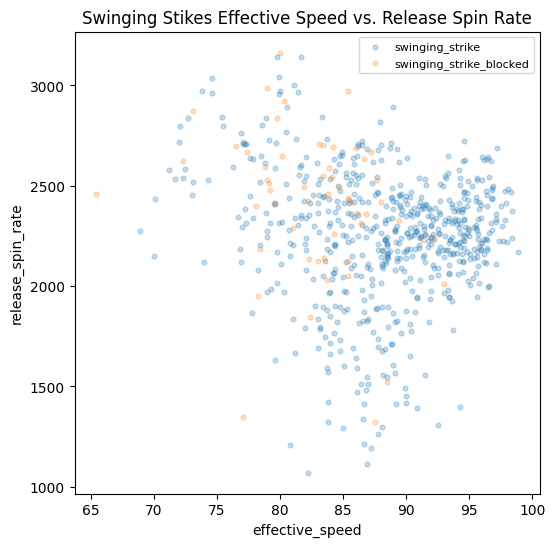

In [61]:
import matplotlib.pyplot as plt

mask = sc_df_reduced["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_reduced[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["effective_speed"], group["release_spin_rate"], alpha=0.25, s=12, label=desc)

plt.xlabel("effective_speed")
plt.ylabel("release_spin_rate")
plt.title("Swinging Stikes Effective Speed vs. Release Spin Rate")
plt.legend(loc="upper right", fontsize=8)
plt.show()
